In [1]:
import sys
sys.path.append('..')
from models.Zebrafish_model_no_head import *

import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# No head model visualization

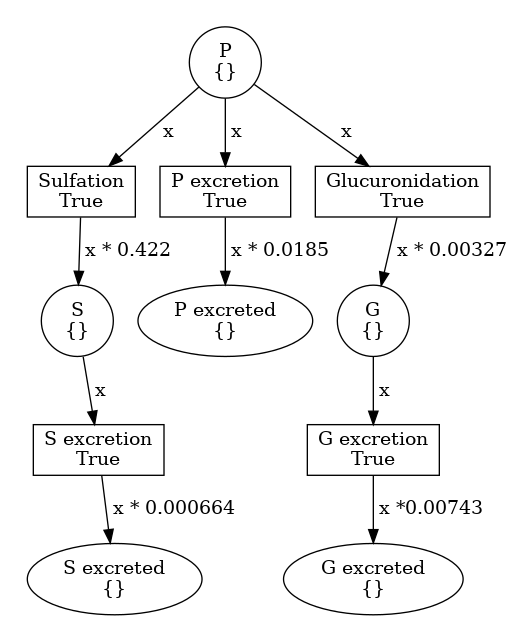

In [2]:
zebra_model = ZebraMolNoHead()
zebra_model.save_img('../results/no_head.png')
Image.open('../results/no_head.png')

## Read results and create plotting finction

In [3]:
# Expreriment without head
p_no_head = np.load('../results/exp_no_head/p_val.npy')
s_no_head = np.load('../results/exp_no_head/s_val.npy')
g_no_head = np.load('../results/exp_no_head/g_val.npy')
cyp_no_head = np.load('../results/exp_no_head/cyp_val.npy')
pe_no_head = np.load('../results/exp_no_head/pe_val.npy')
se_no_head = np.load('../results/exp_no_head/se_val.npy')
ge_no_head = np.load('../results/exp_no_head/ge_val.npy')
cype_no_head = np.load('../results/exp_no_head/cype_val.npy')

In [4]:
def plots(zipped, title, subtitles, linestyle, labels):
  fig, axis = plt.subplots(1,3, figsize=(20,5))
  fig.tight_layout(pad=5.0)
  # fig.suptitle(title, fontsize=24, fontweight='bold')
  i = 0
  for compound in zipped:
    axis[i].set_title(subtitles[i], size=22)
    axis[i].plot(compound[0], color=compound[1], linewidth=4, linestyle=linestyle, label='No head experiments')
    axis[i].set_xlabel(labels[0][0],  fontsize=18)
    axis[i].set_ylabel(labels[0][1],  fontsize=18)
    axis[i].set_yscale("log", base=10)
    axis[i].set_xscale("linear")
    axis[i].legend(prop={'size': 10})
    i += 1
  plt.show()

In [5]:
subtitles_exposure = [
  'Paracetamol in homogenate',
  'Paracetamol-glucuronide in homogenate',
  'Paracetamol-sulfate in homogenate',
]

colors = [
  'blue',
  'magenta',
  'orange',
]

labels_exposure = [
  [
    ('Time (min)'),
    ('Compound (pmoles/larva)')
  ] * 3]
 
title_exposure = 'Internal Exposure'

# Experiment 3
## Homogenate concentration values

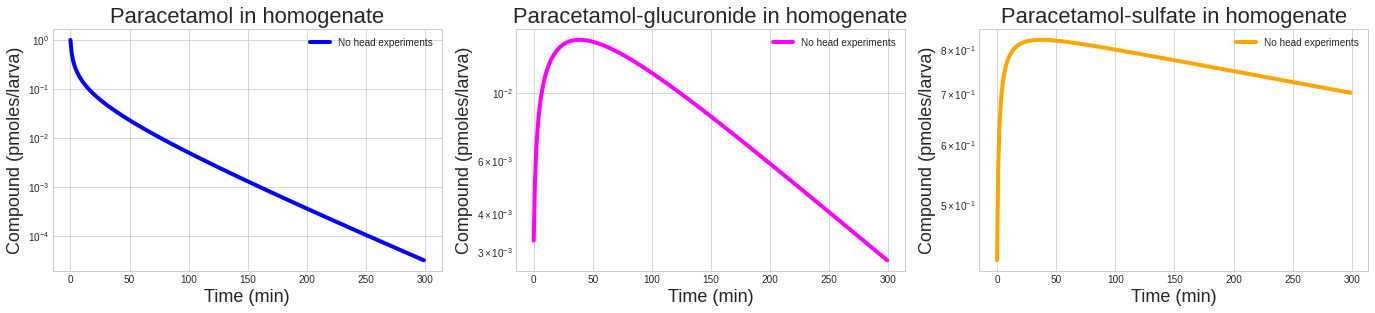

In [6]:
plots(
    zipped = zip([p_no_head, g_no_head, s_no_head, cyp_no_head], colors),
    title=title_exposure,
    subtitles=subtitles_exposure,
    labels=labels_exposure,
    linestyle='solid'
  )

# Excreted paracetamol values

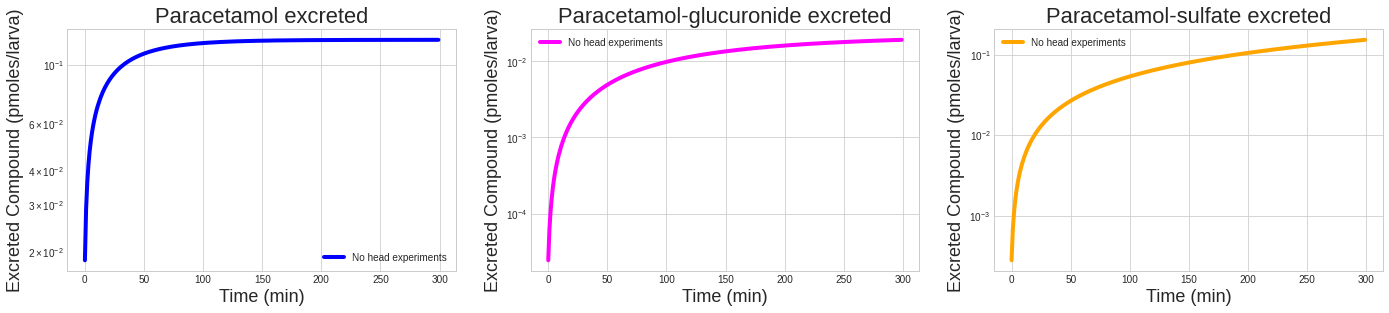

In [7]:
title_excreted = 'Excreted Compound'
subtitles_excreted = [
  'Paracetamol excreted',
  'Paracetamol-glucuronide excreted',
  'Paracetamol-sulfate excreted',
  'Paracetamol-oxidised excreted'
]
labels_excreted = [
  [
    ('Time (min)'),
    ('Excreted Compound (pmoles/larva)')
  ]*4
]

plots(
    zipped = zip([pe_no_head, ge_no_head, se_no_head, cyp_no_head], colors),
    title=title_excreted,
    subtitles=subtitles_excreted,
    labels=labels_excreted,
    linestyle='solid'
  )